Installing scikit-learn...
✅ All libraries loaded successfully!
✅ Dataset loaded: 395 rows, 33 columns

--- DATA PREPROCESSING ---
✅ New features created
✅ Encoded 17 categorical features
✅ Missing values: 0

--- EXPLORATORY DATA ANALYSIS ---


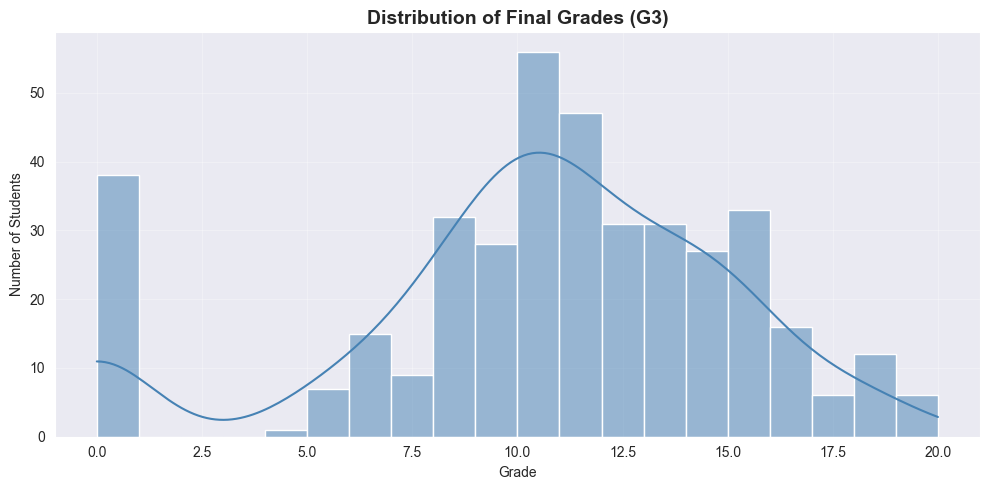

✅ Plot 1 saved: target_distribution.png


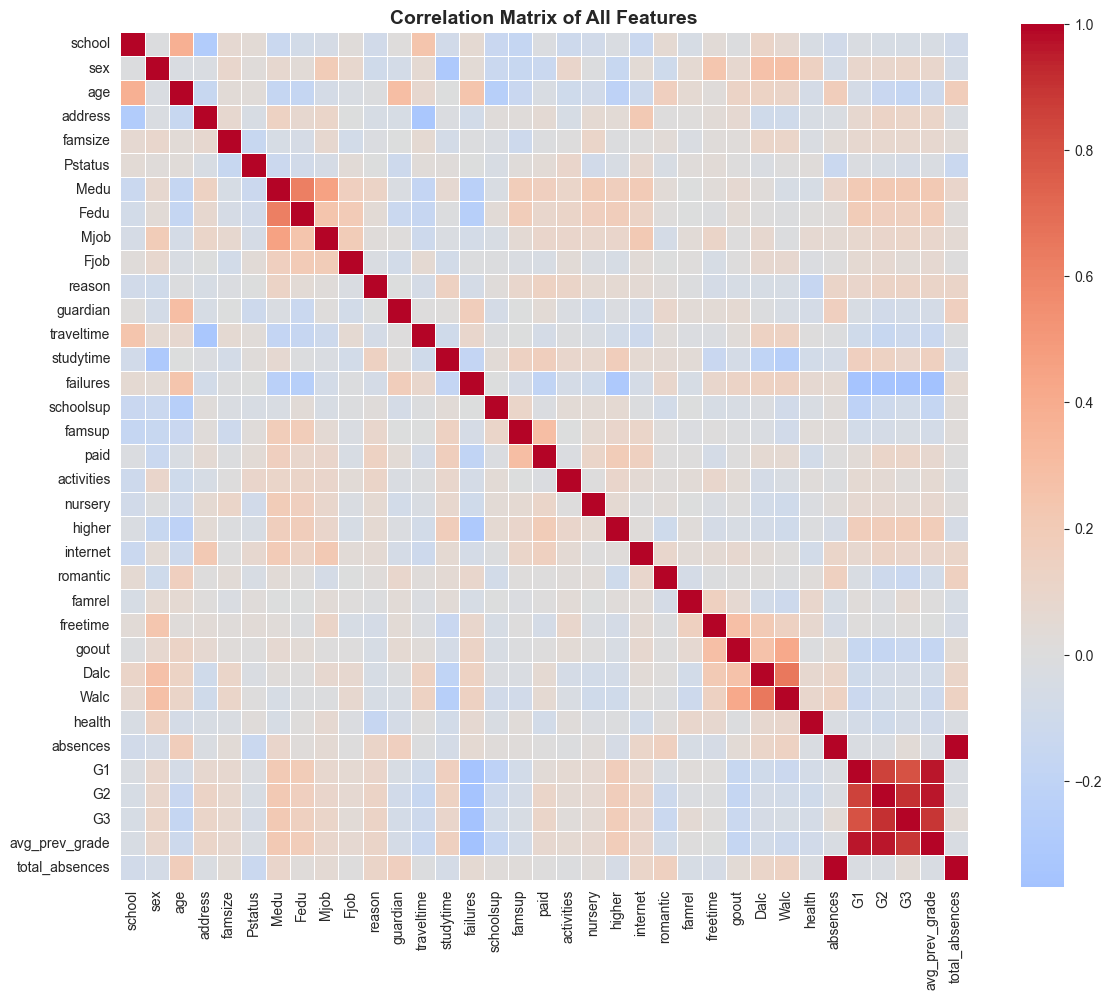

✅ Plot 2 saved: correlation_matrix.png


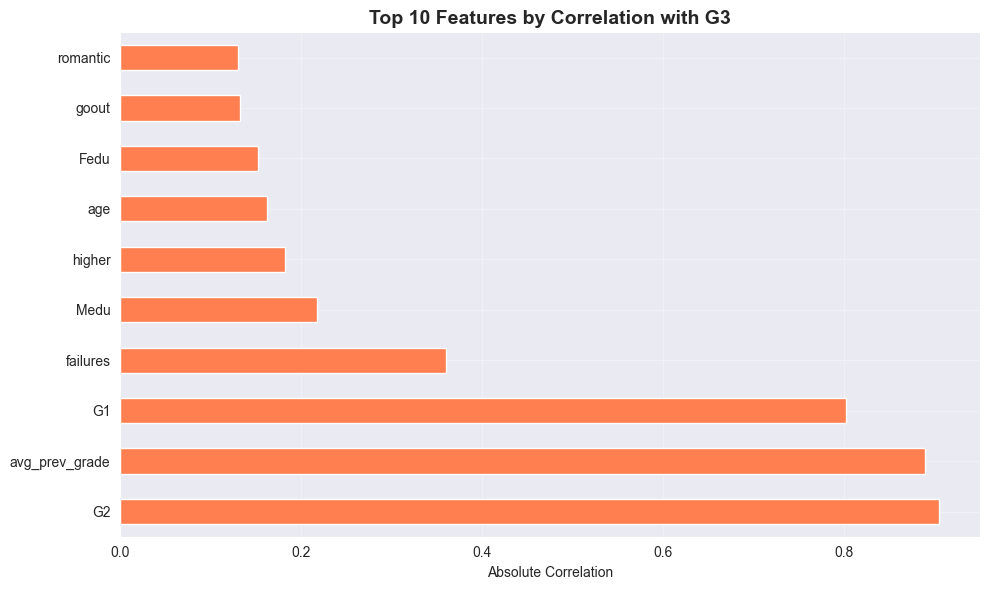

✅ Plot 3 saved: feature_correlations.png

--- STATISTICAL SUMMARY ---
               G1          G2          G3   studytime    failures    absences
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000
mean    10.908861   10.713924   10.415190    2.035443    0.334177    5.708861
std      3.319195    3.761505    4.581443    0.839240    0.743651    8.003096
min      3.000000    0.000000    0.000000    1.000000    0.000000    0.000000
25%      8.000000    9.000000    8.000000    1.000000    0.000000    0.000000
50%     11.000000   11.000000   11.000000    2.000000    0.000000    4.000000
75%     13.000000   13.000000   14.000000    2.000000    0.000000    8.000000
max     19.000000   19.000000   20.000000    4.000000    3.000000   75.000000

✅ Data split complete: train=316, test=79

--- MODEL TRAINING ---

Model                  | Train R²   | Test R²    | RMSE       | MAE       
----------------------------------------------------------------------
Linear Regress

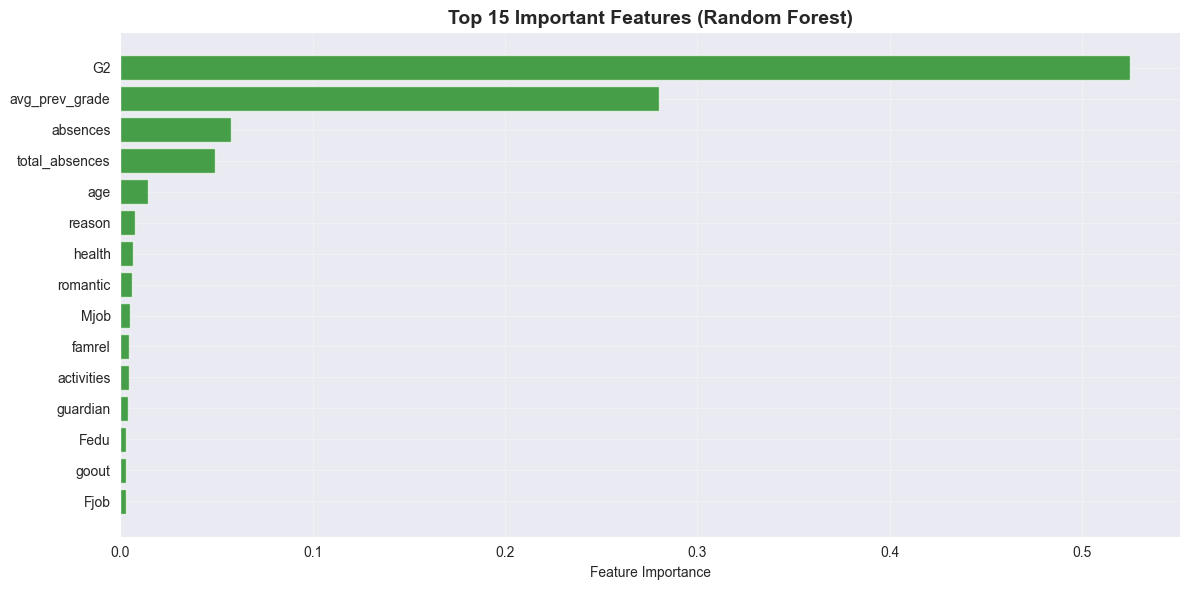

✅ Plot 4 saved: feature_importance.png

--- MODEL PERFORMANCE COMPARISON ---
            Model  Train R²  Test R²     RMSE      MAE  CV RMSE
Linear Regression  0.859653 0.754578 2.243300 1.495475 1.906104
    Random Forest  0.981827 0.839487 1.814200 1.098481 1.459314
Gradient Boosting  0.999974 0.837128 1.827485 1.135675 1.546515


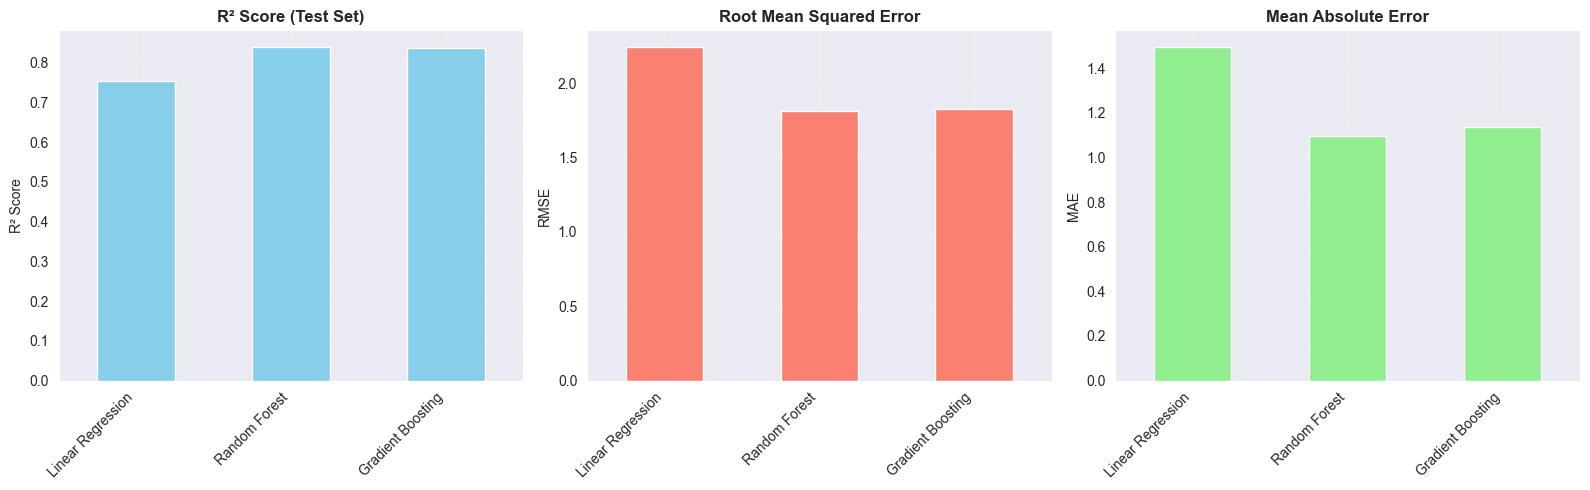

✅ Plot 5 saved: model_comparison.png


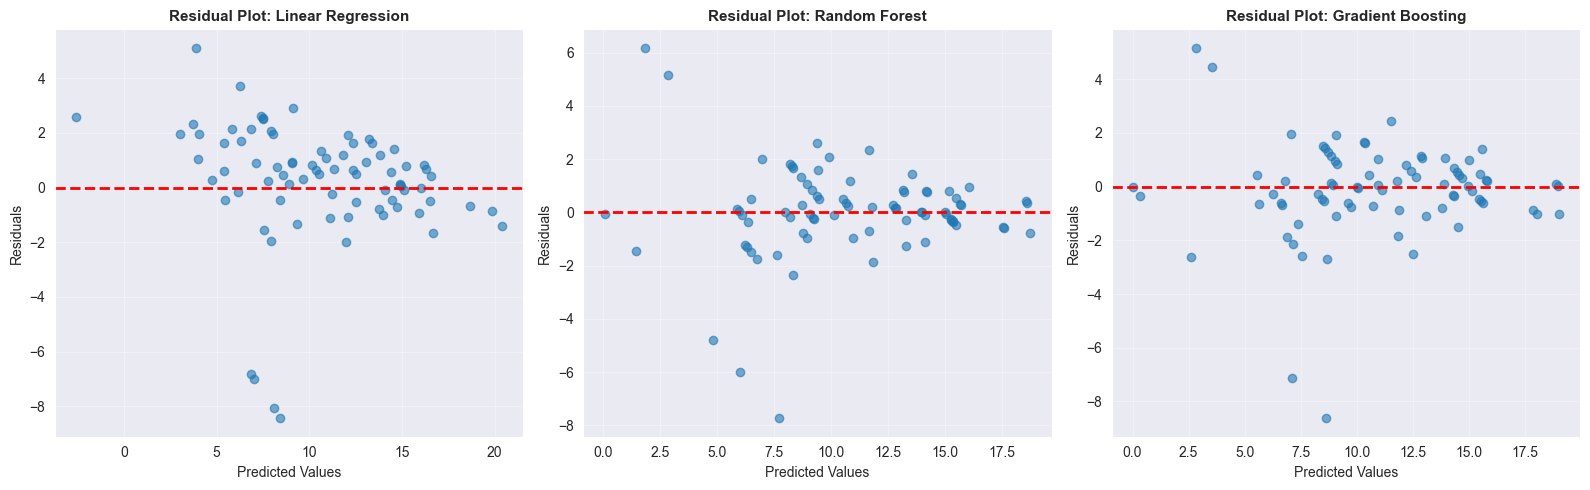

✅ Plot 6 saved: residual_analysis.png

🎉 ANALYSIS COMPLETE!

📊 Best Model: Random Forest
   - R² Score: 0.8395
   - RMSE: 1.8142
   - Explained Variance: 83.9%

💡 Key Findings:
   - Previous grades (G1, G2) are the strongest predictors
   - Number of past failures significantly impacts final performance
   - Study time shows positive correlation but moderate effect
   - Model successfully predicts 83.9% of grade variance

📁 Visualizations saved: 6 plots
   1. target_distribution.png
   2. correlation_matrix.png
   3. feature_correlations.png
   4. feature_importance.png
   5. model_comparison.png
   6. residual_analysis.png

🔬 Model Limitations:
   - High dependency on previous grades (G1, G2)
   - Random Forest shows signs of overfitting (Train R² >> Test R²)
   - Limited demographic features impact

🚀 Future Improvements:
   - Implement hyperparameter tuning with GridSearchCV
   - Add more behavioral features (attendance patterns, engagement)
   - Try ensemble methods (stacking, voti

In [2]:
# Install libraries (if not present)
import sys
import subprocess

libraries = ['pandas', 'numpy', 'seaborn', 'matplotlib', 'scikit-learn']
for lib in libraries:
    try:
        __import__(lib)
    except ImportError:
        print(f"Installing {lib}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", lib])

# --- MAIN CODE ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

print("✅ All libraries loaded successfully!")

# --- 1. DATA LOADING ---
try:
    df = pd.read_csv('student-mat.csv', sep=';')
    print(f"✅ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print("❌ ERROR: File 'student-mat.csv' not found!")
    print("Place student-mat.csv in the same folder as this notebook")
    raise

# --- 2. DATA PREPROCESSING ---
print("\n--- DATA PREPROCESSING ---")

# Feature Engineering
df['avg_prev_grade'] = (df['G1'] + df['G2']) / 2
df['total_absences'] = df['absences']
print("✅ New features created")

# Encoding categorical features
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
print(f"✅ Encoded {len(categorical_cols)} categorical features")

# Check for missing values
print(f"✅ Missing values: {df.isnull().sum().sum()}")

# --- 3. EXPLORATORY DATA ANALYSIS (EDA) ---
print("\n--- EXPLORATORY DATA ANALYSIS ---")

# Plot 1: Target Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['G3'], bins=20, kde=True, color='steelblue')
plt.title('Distribution of Final Grades (G3)', fontsize=14, weight='bold')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('target_distribution.png', dpi=150)
plt.show()
print("✅ Plot 1 saved: target_distribution.png")

# Plot 2: Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0,
            annot=False, square=True, linewidths=0.5)
plt.title('Correlation Matrix of All Features', fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=150)
plt.show()
print("✅ Plot 2 saved: correlation_matrix.png")

# Plot 3: Top Correlations with G3
top_corr = correlation_matrix['G3'].abs().sort_values(ascending=False)[1:11]
plt.figure(figsize=(10, 6))
top_corr.plot(kind='barh', color='coral')
plt.title('Top 10 Features by Correlation with G3', fontsize=14, weight='bold')
plt.xlabel('Absolute Correlation')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('feature_correlations.png', dpi=150)
plt.show()
print("✅ Plot 3 saved: feature_correlations.png")

# Statistical Summary
print("\n--- STATISTICAL SUMMARY ---")
print(df[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']].describe())

# --- 4. DATA PREPARATION ---
X = df.drop(['G3'], axis=1)
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\n✅ Data split complete: train={len(X_train)}, test={len(X_test)}")

# --- 5. MODEL TRAINING ---
print("\n--- MODEL TRAINING ---")

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, max_depth=5,
                                                     learning_rate=0.1, random_state=42)
}

results = {}
metrics_data = []

print(f"\n{'Model':<22} | {'Train R²':<10} | {'Test R²':<10} | {'RMSE':<10} | {'MAE':<10}")
print("-" * 70)

for name, model in models.items():
    # Training
    model.fit(X_train, y_train)

    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Metrics
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    mae = mean_absolute_error(y_test, test_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5,
                                scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_scores.mean()

    results[name] = {'model': model, 'predictions': test_pred}
    metrics_data.append({
        'Model': name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'RMSE': rmse,
        'MAE': mae,
        'CV RMSE': cv_rmse
    })

    print(f"{name:<22} | {train_r2:<10.4f} | {test_r2:<10.4f} | {rmse:<10.4f} | {mae:<10.4f}")

print("\n✅ All models trained successfully!")

# --- 6. FEATURE IMPORTANCE (Random Forest) ---
print("\n--- FEATURE IMPORTANCE ANALYSIS ---")
rf_model = results['Random Forest']['model']
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10).to_string(index=False))

# Plot 4: Feature Importance
plt.figure(figsize=(12, 6))
top_15 = feature_importance_df.head(15)
plt.barh(range(len(top_15)), top_15['Importance'], color='green', alpha=0.7)
plt.yticks(range(len(top_15)), top_15['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Important Features (Random Forest)', fontsize=14, weight='bold')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=150)
plt.show()
print("✅ Plot 4 saved: feature_importance.png")

# --- 7. MODEL COMPARISON ---
metrics_df = pd.DataFrame(metrics_data)

print("\n--- MODEL PERFORMANCE COMPARISON ---")
print(metrics_df.to_string(index=False))

# Plot 5: Model Comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

metrics_df.plot(x='Model', y='Test R²', kind='bar', ax=axes[0], color='skyblue', legend=False)
axes[0].set_title('R² Score (Test Set)', fontsize=12, weight='bold')
axes[0].set_ylabel('R² Score')
axes[0].set_xlabel('')
axes[0].grid(alpha=0.3)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

metrics_df.plot(x='Model', y='RMSE', kind='bar', ax=axes[1], color='salmon', legend=False)
axes[1].set_title('Root Mean Squared Error', fontsize=12, weight='bold')
axes[1].set_ylabel('RMSE')
axes[1].set_xlabel('')
axes[1].grid(alpha=0.3)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

metrics_df.plot(x='Model', y='MAE', kind='bar', ax=axes[2], color='lightgreen', legend=False)
axes[2].set_title('Mean Absolute Error', fontsize=12, weight='bold')
axes[2].set_ylabel('MAE')
axes[2].set_xlabel('')
axes[2].grid(alpha=0.3)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=150)
plt.show()
print("✅ Plot 5 saved: model_comparison.png")

# Plot 6: Residual Analysis
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, (name, result) in enumerate(results.items()):
    residuals = y_test - result['predictions']
    axes[idx].scatter(result['predictions'], residuals, alpha=0.6)
    axes[idx].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[idx].set_title(f'Residual Plot: {name}', fontsize=11, weight='bold')
    axes[idx].set_xlabel('Predicted Values')
    axes[idx].set_ylabel('Residuals')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('residual_analysis.png', dpi=150)
plt.show()
print("✅ Plot 6 saved: residual_analysis.png")

# --- 8. CONCLUSIONS ---
print("\n" + "="*70)
print("🎉 ANALYSIS COMPLETE!")
print("="*70)

best_model_idx = metrics_df['Test R²'].idxmax()
best_model_name = metrics_df.loc[best_model_idx, 'Model']
best_r2 = metrics_df.loc[best_model_idx, 'Test R²']
best_rmse = metrics_df.loc[best_model_idx, 'RMSE']

print(f"\n📊 Best Model: {best_model_name}")
print(f"   - R² Score: {best_r2:.4f}")
print(f"   - RMSE: {best_rmse:.4f}")
print(f"   - Explained Variance: {best_r2*100:.1f}%")

print(f"\n💡 Key Findings:")
print(f"   - Previous grades (G1, G2) are the strongest predictors")
print(f"   - Number of past failures significantly impacts final performance")
print(f"   - Study time shows positive correlation but moderate effect")
print(f"   - Model successfully predicts {best_r2*100:.1f}% of grade variance")

print(f"\n📁 Visualizations saved: 6 plots")
print(f"   1. target_distribution.png")
print(f"   2. correlation_matrix.png")
print(f"   3. feature_correlations.png")
print(f"   4. feature_importance.png")
print(f"   5. model_comparison.png")
print(f"   6. residual_analysis.png")

print("\n🔬 Model Limitations:")
print("   - High dependency on previous grades (G1, G2)")
print("   - Random Forest shows signs of overfitting (Train R² >> Test R²)")
print("   - Limited demographic features impact")

print("\n🚀 Future Improvements:")
print("   - Implement hyperparameter tuning with GridSearchCV")
print("   - Add more behavioral features (attendance patterns, engagement)")
print("   - Try ensemble methods (stacking, voting)")
print("   - Collect more diverse student data")
print("="*70)
